In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. BINNING

In [5]:
stroke_data = pd.read_csv('stroke prediction.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
#Creating Bins
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged', 'senior_citizen']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [7]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager


In [8]:
#Binnng using decision tress split
bins=[0,49.5,66.5,77.5,90]
group=['Bin_1','Bin_2','Bin_3','Bin_4']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [9]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,Bin_1
1,58.0,Bin_2
2,8.0,Bin_1
3,70.0,Bin_3
4,14.0,Bin_1


# 2. Combining Sparce classes

In [10]:
bigmart = pd.read_csv('train_bm.csv')

In [11]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
bigmart.shape

(8523, 12)

In [13]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##### One hot Encoding¶

In [14]:
bigmart['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [16]:
bigmart_encoded = pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


We have two problems here: 

Problem 1:

Look at the newly created variables 'Outlet_Size_High Outlet_Size_Medium Outlet_Size_Small', the order between these variables is destroyed. As a result we are missing out on some important information. 


In [17]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0


In [18]:
Problem 2

The number of features has increased from 12 to 1600, where maximum values are 0


SyntaxError: invalid syntax (<ipython-input-18-58c02519de99>, line 1)

In [ ]:
bigmart_encoded.shape, bigmart.shape

In [ ]:
bigmart_encoded[['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25', 'Item_Identifier_DRB48',
       'Item_Identifier_DRC01', 'Item_Identifier_DRC12',
       'Item_Identifier_DRC13', 'Item_Identifier_DRC24',
       'Item_Identifier_DRC25', 'Item_Identifier_DRC27',
       'Item_Identifier_DRC36', 'Item_Identifier_DRC49',
       'Item_Identifier_DRD01', 'Item_Identifier_DRD12',
       'Item_Identifier_DRD13', 'Item_Identifier_DRD15',
       'Item_Identifier_DRD24', 'Item_Identifier_DRD25',
       'Item_Identifier_DRD27', 'Item_Identifier_DRD37',
       'Item_Identifier_DRD49']].head()

##### Problem 1 solution - Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
bigmart['Outlet_Size'].value_counts()

In [ ]:
le = LabelEncoder()
le.fit_transform(['Small', 'Medium', 'High'])

In [ ]:
#Label encoder uses the alphabetical order. 
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

In [ ]:
bigmart['Outlet_Size'].head()

So that solves the first challenge we encountered. Now we'll see how to deal with high cardinality.

##### Problem 2 solution

In [ ]:
bigmart.nunique()

In [ ]:
bigmart['Item_Identifier'].value_counts()

In [ ]:
temp= bigmart['Item_Identifier'].value_counts()
temp.head()

In [ ]:
bigmart['Item_identifier_count'] = bigmart['Item_Identifier'].apply(lambda x: temp[x])
bigmart[['Item_Identifier','Item_identifier_count']].head()

In [ ]:
for i in range(0, len(bigmart)):
    if bigmart['Item_identifier_count'][i] < 4:
        bigmart['Item_Identifier'][i] = 'other'

In [ ]:
bigmart.head(7)

In [ ]:
bigmart['Item_Identifier'].value_counts()

# 3. Feature Encoding

In [ ]:
bigmart = pd.read_csv('train_bm.csv')

In [ ]:
bigmart.head()

In [ ]:
bigmart.dtypes

##### Encoding a single variable- Outlet Type

In [ ]:
bigmart['Outlet_Type'].value_counts()

In [ ]:
pd.get_dummies(bigmart['Outlet_Type']).head()

##### Doing one hot encoding for all the variables

In [ ]:
bigmart_encoded = pd.get_dummies(bigmart)
bigmart_encoded.head()

We have two problems here: 

Problem 1:

Look at the newly created variables 'Outlet_Size_High Outlet_Size_Medium Outlet_Size_Small', the order between these variables is destroyed. As a result we are missing out on some important information. 


In [ ]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

Problem 2

The number of features has increased from 12 to 1600, where maximum values are 0.


In [ ]:
bigmart.shape, bigmart_encoded.shape

In [ ]:
bigmart[['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25', 'Item_Identifier_DRB48',
       'Item_Identifier_DRC01', 'Item_Identifier_DRC12',
       'Item_Identifier_DRC13', 'Item_Identifier_DRC24',
       'Item_Identifier_DRC25', 'Item_Identifier_DRC27',
       'Item_Identifier_DRC36', 'Item_Identifier_DRC49',
       'Item_Identifier_DRD01', 'Item_Identifier_DRD12',
       'Item_Identifier_DRD13', 'Item_Identifier_DRD15',
       'Item_Identifier_DRD24', 'Item_Identifier_DRD25',
       'Item_Identifier_DRD27', 'Item_Identifier_DRD37',
       'Item_Identifier_DRD49']].head()

In [ ]:
Problem 1 solution

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
bigmart['Outlet_Size'].value_counts()

In [ ]:
le.fit_transform(['Small', 'Medium', 'High'])

Label encoder uses the alphabetical order. 

In [ ]:
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

So that solves the first challenge we encountered. Now we'll see how to deal with high cardinality.

# 4. FEATURE INTERACTION
Load Loan Prediction Dataset

In [ ]:
loan_data = pd.read_csv('train_loan.csv')
loan_data.head()

##### Feature 1 -Total Income

In [ ]:
loan_data['Total_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome'] 
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'Total_income']].head()

##### Feature 2 - Loan amount and Income Ratio

In [ ]:
loan_data['loan_income_ratio'] = loan_data['LoanAmount'] / loan_data['ApplicantIncome']
loan_data[['ApplicantIncome', 'LoanAmount', 'loan_income_ratio']].head()

# 5. FEATURE SCALING

In [ ]:
bigmart = pd.read_csv('train_bm.csv')

In [ ]:
data = bigmart[['Item_Visibility', 'Item_MRP']]
data.head()

##### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

In [ ]:
scaled_data.describe()

##### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

In [ ]:
scaled_data.describe()

# 6. FEATURE TRANSFORMATION

In [19]:
bigmart = pd.read_csv('train_bm.csv')

In [20]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### Item Visibility Visualization

<AxesSubplot:>

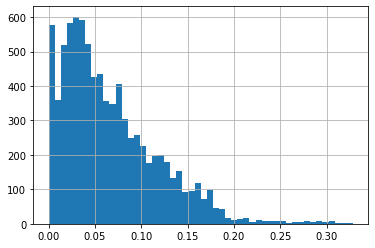

In [22]:
bigmart['Item_Visibility'].hist(bins=50)

We see that its a right skewed distribution. In this case we can take the root or apply log function. Lets try using a square root. 

In [23]:
item_visibility_squareroot = np.sqrt(bigmart['Item_Visibility'])

<AxesSubplot:>

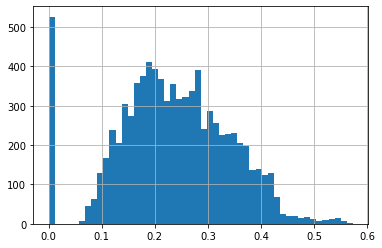

In [24]:
item_visibility_squareroot.hist(bins=50)

The resultant is a normal distribution. Now lets use the log function. 

In [25]:
item_visibility_log = np.log(bigmart['Item_Visibility'])

** This Shows a warning - 'divide by zero encountered in log'. Lets look at the range of the values in the visibility column**

In [26]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

The minimun value we have is 0, and log(0) is not defined. Thus its showing us an error. So lets add 0.1 to each value and then take the log

<AxesSubplot:>

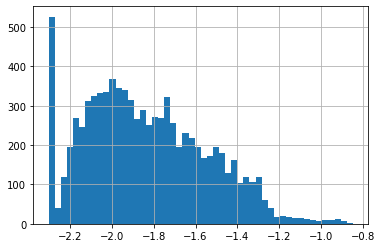

In [27]:
item_visibility_log = np.log(bigmart['Item_Visibility']+0.1)
item_visibility_log.hist(bins=50)

Here we get the visibility in negatives. This is because the values in the column are less than 1.


<AxesSubplot:>

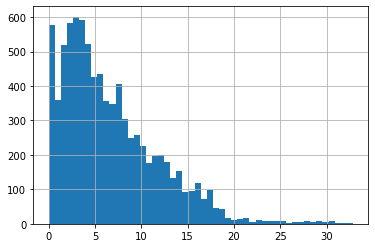

In [28]:
visibility = bigmart['Item_Visibility']*100
visibility.hist(bins=50)

In [29]:
#Now taking the log
log_visibility = np.log(visibility+1)

<AxesSubplot:>

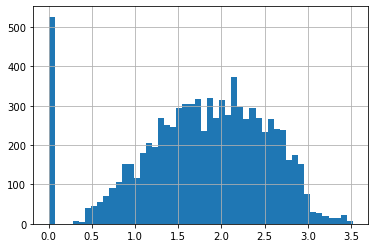

In [30]:
log_visibility.hist(bins=50)

*Now we see that the distribution is symmetric and also the values are positive. *

# 7. MISSING VALUES

In [31]:
#Load the stroke prediction Dataset
stroke_data = pd.read_csv('stroke prediction.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [32]:
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [33]:
stroke_data["smoking_status_NA"]=stroke_data["smoking_status"].isnull()*1

In [34]:
stroke_data[['smoking_status_NA', 'smoking_status']].head()

,smoking_status_NA,smoking_status
0,1,NaN
1,0,never smoked
2,1,NaN
3,0,formerly smoked
4,1,NaN


# 8. FREQUENCY ENCODING

In [35]:
bigmart= pd.read_csv('train_bm.csv')
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
bigmart['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

##### Frrequency Encoding

In [37]:
temp = bigmart['Item_Type'].value_counts()
temp.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

In [38]:
bigmart['Item_type_count'] = bigmart['Item_Type'].apply(lambda x: temp[x])
bigmart[['Item_Identifier', 'Item_Type', 'Item_type_count']].head()

,Item_Identifier,Item_Type,Item_type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


##### Mean Encoding (using Target Variable)

In [39]:
bigmart[['Item_Type', 'Item_Outlet_Sales']].head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [40]:
bigmart.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

# 9. FEATURE TOOLS
Featuretools Installation
Before Running this notebook, you would need to install featuretools in your system. 

Use the following command:
!pip install featuretools

In [48]:
import featuretools as ft

In [41]:
df = pd.read_csv('train_bm.csv')
df.shape

(8523, 12)

In [46]:
features = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

##### Make an entityset and add the entity

In [49]:
es = ft.EntitySet(id = 'bigmart')
es

Entityset: bigmart
  Entities:
  Relationships:
    No relationships

##### Add data to this entityset created

In [50]:
es.entity_from_dataframe(entity_id = 'data_1', dataframe = features, 
                         make_index = True, index = 'index')

es

Entityset: bigmart
  Entities:
    data_1 [Rows: 8523, Columns: 12]
  Relationships:
    No relationships

In [51]:
#Feature Engineering
# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data_1', max_depth=1,
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_MRP + Outlet_Establishment_Year,Item_Visibility + Item_Weight,Item_Visibility + Outlet_Establishment_Year,Item_Weight + Outlet_Establishment_Year,Item_MRP * Item_Visibility,Item_MRP * Item_Weight,Item_MRP * Outlet_Establishment_Year,Item_Visibility * Item_Weight,Item_Visibility * Outlet_Establishment_Year,Item_Weight * Outlet_Establishment_Year
index,,,,,,,,,,,,,,,,,,,,,
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,2248.8092,9.316047,1999.016047,2008.30,4.008763,2323.225560,499368.5908,0.149240,32.078555,18590.70
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,2057.2692,5.939278,2009.019278,2014.92,0.930544,285.753664,96972.8228,0.114127,38.729936,11893.28
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,2140.6180,17.516760,1999.016760,2016.50,2.373528,2478.315000,283094.3820,0.293301,33.503390,34982.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,2180.0950,19.200000,1998.000000,2017.20,0.000000,3496.224000,363825.8100,0.000000,0.000000,38361.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,2040.8614,8.930000,1987.000000,1995.93,0.000000,480.982302,107022.6018,0.000000,0.000000,17743.91


In [52]:
feature_defs

[<Feature: Item_Identifier>,
 <Feature: Item_Weight>,
 <Feature: Item_Fat_Content>,
 <Feature: Item_Visibility>,
 <Feature: Item_Type>,
 <Feature: Item_MRP>,
 <Feature: Outlet_Identifier>,
 <Feature: Outlet_Establishment_Year>,
 <Feature: Outlet_Size>,
 <Feature: Outlet_Location_Type>,
 <Feature: Outlet_Type>,
 <Feature: Item_MRP + Item_Visibility>,
 <Feature: Item_MRP + Item_Weight>,
 <Feature: Item_MRP + Outlet_Establishment_Year>,
 <Feature: Item_Visibility + Item_Weight>,
 <Feature: Item_Visibility + Outlet_Establishment_Year>,
 <Feature: Item_Weight + Outlet_Establishment_Year>,
 <Feature: Item_MRP * Item_Visibility>,
 <Feature: Item_MRP * Item_Weight>,
 <Feature: Item_MRP * Outlet_Establishment_Year>,
 <Feature: Item_Visibility * Item_Weight>,
 <Feature: Item_Visibility * Outlet_Establishment_Year>,
 <Feature: Item_Weight * Outlet_Establishment_Year>]

In [53]:
feature_matrix.shape

(8523, 23)

In [54]:
# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data_1', max_depth=2,
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_MRP + Outlet_Establishment_Year,Item_Visibility + Item_Weight,Item_Visibility + Outlet_Establishment_Year,Item_Weight + Outlet_Establishment_Year,Item_MRP * Item_Visibility,Item_MRP * Item_Weight,Item_MRP * Outlet_Establishment_Year,Item_Visibility * Item_Weight,Item_Visibility * Outlet_Establishment_Year,Item_Weight * Outlet_Establishment_Year
index,,,,,,,,,,,,,,,,,,,,,
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,2248.8092,9.316047,1999.016047,2008.30,4.008763,2323.225560,499368.5908,0.149240,32.078555,18590.70
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,2057.2692,5.939278,2009.019278,2014.92,0.930544,285.753664,96972.8228,0.114127,38.729936,11893.28
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,2140.6180,17.516760,1999.016760,2016.50,2.373528,2478.315000,283094.3820,0.293301,33.503390,34982.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,2180.0950,19.200000,1998.000000,2017.20,0.000000,3496.224000,363825.8100,0.000000,0.000000,38361.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,2040.8614,8.930000,1987.000000,1995.93,0.000000,480.982302,107022.6018,0.000000,0.000000,17743.91


In [55]:
feature_defs

[<Feature: Item_Identifier>,
 <Feature: Item_Weight>,
 <Feature: Item_Fat_Content>,
 <Feature: Item_Visibility>,
 <Feature: Item_Type>,
 <Feature: Item_MRP>,
 <Feature: Outlet_Identifier>,
 <Feature: Outlet_Establishment_Year>,
 <Feature: Outlet_Size>,
 <Feature: Outlet_Location_Type>,
 <Feature: Outlet_Type>,
 <Feature: Item_MRP + Item_Visibility>,
 <Feature: Item_MRP + Item_Weight>,
 <Feature: Item_MRP + Outlet_Establishment_Year>,
 <Feature: Item_Visibility + Item_Weight>,
 <Feature: Item_Visibility + Outlet_Establishment_Year>,
 <Feature: Item_Weight + Outlet_Establishment_Year>,
 <Feature: Item_MRP * Item_Visibility>,
 <Feature: Item_MRP * Item_Weight>,
 <Feature: Item_MRP * Outlet_Establishment_Year>,
 <Feature: Item_Visibility * Item_Weight>,
 <Feature: Item_Visibility * Outlet_Establishment_Year>,
 <Feature: Item_Weight * Outlet_Establishment_Year>]

# 10. DATETIME FEATURES

In [56]:
df = pd.read_csv('No2 dataset.csv')
df.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [57]:
df['Date_Time'].max(), df['Date_Time'].min()

('31/08/2004 23.00.00', '01/04/2004 00.00.00')

In [58]:
df.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

##### Convert to datetime

In [59]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format= '%d/%m/%Y %H.%M.%S')
df.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

The format depends on your data. Here are a few examples
1.1/12/2001: %d/%m/%Y
2.2001/12/1: %Y/%m/%d
3.2001-12-01: %Y-%m-%d
4.2001-12-01 09:00: %Y-%m-%d %H:%M

In [60]:
df['Date_Time'].max(), df['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

##### Extract hour and minute

In [61]:
df['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int64

In [62]:
df['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int64

##### The day of week - Monday (0) to Sunday (6)

In [63]:
df['Date_Time'].dt.dayofweek.head(7) 

0    2
1    2
2    2
3    2
4    2
5    2
6    3
Name: Date_Time, dtype: int64

In [65]:
df['Date_Time'].dt.weekday_name.head(7)

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

##### Extracting the month from the date

In [66]:
df['Date_Time'].dt.month.head(7)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
Name: Date_Time, dtype: int64

In [67]:
df['Date_Time'].dt.is_month_end.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Date_Time, dtype: bool

In [68]:
#Put it all together
new_df = pd.DataFrame({"year": df['Date_Time'].dt.year,
              "month": df['Date_Time'].dt.month,
              "day": df['Date_Time'].dt.day,
              "hour": df['Date_Time'].dt.hour,
              "dayofyear": df['Date_Time'].dt.dayofyear,
              "week": df['Date_Time'].dt.week,
              "dayofweek": df['Date_Time'].dt.dayofweek,
              "dayofweekname": df['Date_Time'].dt.weekday_name,
              "quarter": df['Date_Time'].dt.quarter,
             })
new_df.head()

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [70]:
complete_data = pd.concat([df, new_df], axis=1)
complete_data.head()

NameError: name 'new_df' is not defined

##### is_weekday? (Create using the dayofweek numbers)

In [69]:
complete_data['is_weekday']=0 

for i in range(0, len(complete_data)):
    if ((complete_data['dayofweek'][i] == 5) | (complete_data['dayofweek'][i] == 6)):
        complete_data['is_weekday'][i] = 0
    else: 
        complete_data['is_weekday'][i] = 1

NameError: name 'complete_data' is not defined

In [ ]:
complete_data[['dayofweek', 'is_weekday']].head()

##### Difference Between Dates

In [ ]:
agent = pd.read_csv('agent_classification.csv')
agent.head()

In [ ]:
agent[['Application_Receipt_Date','Applicant_BirthDate']].head()

In [ ]:
agent['Application_Receipt_Date'] = pd.to_datetime(agent['Application_Receipt_Date'], format='%m/%d/%Y')
agent['Applicant_BirthDate'] = pd.to_datetime(agent['Applicant_BirthDate'], format='%m/%d/%Y')

In [ ]:
(agent['Application_Receipt_Date'][0] - agent['Applicant_BirthDate'][0]).days

In [ ]:
agent['Applicant_age'] = agent.apply(lambda x: (x['Application_Receipt_Date'] - x['Applicant_BirthDate']).days, axis=1)